In [1]:
# svm - support vecot machines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

#seaborn plotting defaults
import seaborn as sns; sns.set()

/Users/pritish/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


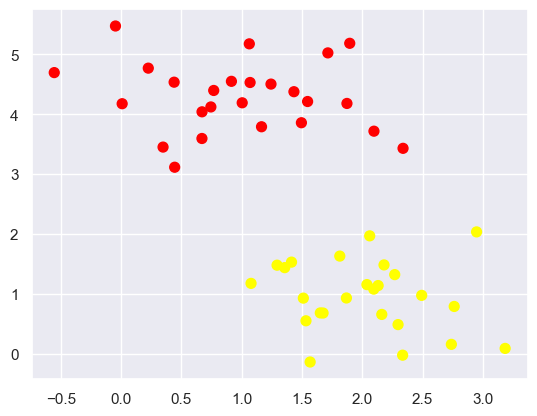

In [2]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=50, centers=2, random_state=0, cluster_std=0.60)
plt.scatter(X[:,0], X[:,1], c=y,s=50,cmap='autumn')

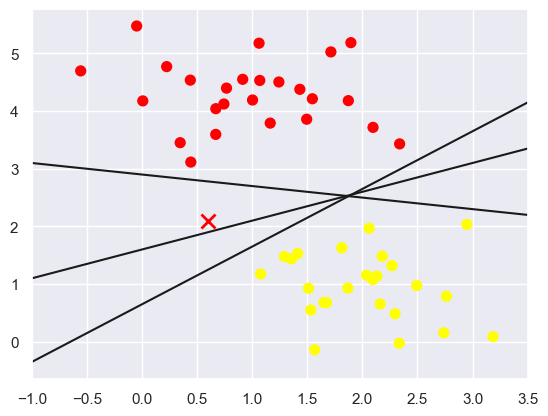

In [3]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plt.plot([0.6], [2.1], 'x', color='red', markeredgewidth=2, markersize=10)
for m, b in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)]: 
    plt.plot(xfit, m * xfit + b, '-k')
plt.xlim(-1, 3.5);

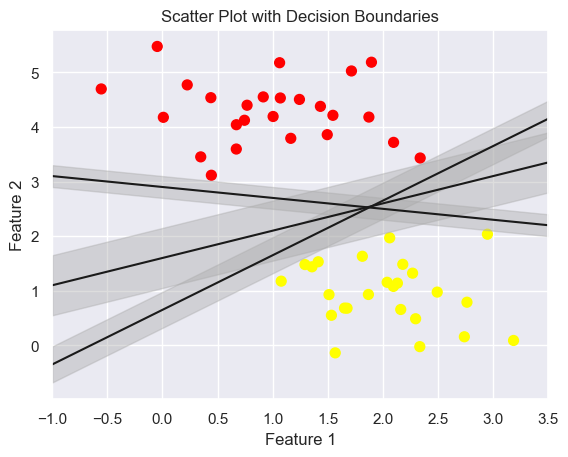

In [4]:
# Generating the x-axis values for the fit lines
xfit = np.linspace(-1, 3.5)

# Plotting the scatter plot
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

# Plotting lines with margins
for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
    yfit = m * xfit + b
    plt.plot(xfit, yfit, '-k')
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none', color='#AAAAAA', alpha=0.4)

plt.xlim(-1, 3.5)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Scatter Plot with Decision Boundaries')
plt.show()    

In [5]:
from sklearn.svm import SVC # "Support vector classifier" 
model = SVC(kernel='linear', C=1E10)
model.fit(X, y)

SVC(C=10000000000.0, kernel='linear')

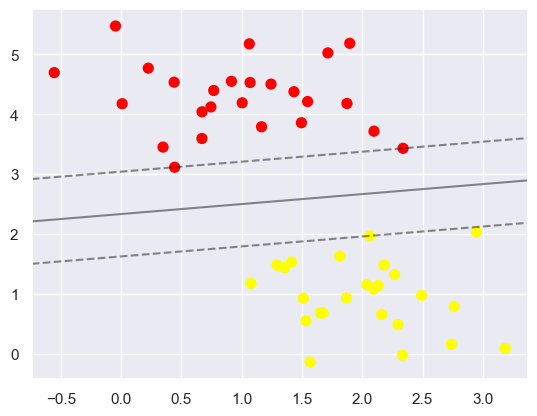

In [6]:
def plot_svc_decision_function(model, ax=None, plot_support=True): 
    """Plot the decision function for a two-dimensional SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)

    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
              levels=[-1, 0, 1], alpha=0.5,
              linestyles=['--', '-', '--'])

    # plot support vectors
    if plot_support: 
        ax.scatter(model.support_vectors_[:, 0],
                    model.support_vectors_[:, 1],
                    s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(model);

In [7]:
model.support_vectors_

array([[0.44359863, 3.11530945],
       [2.33812285, 3.43116792],
       [2.06156753, 1.96918596]])

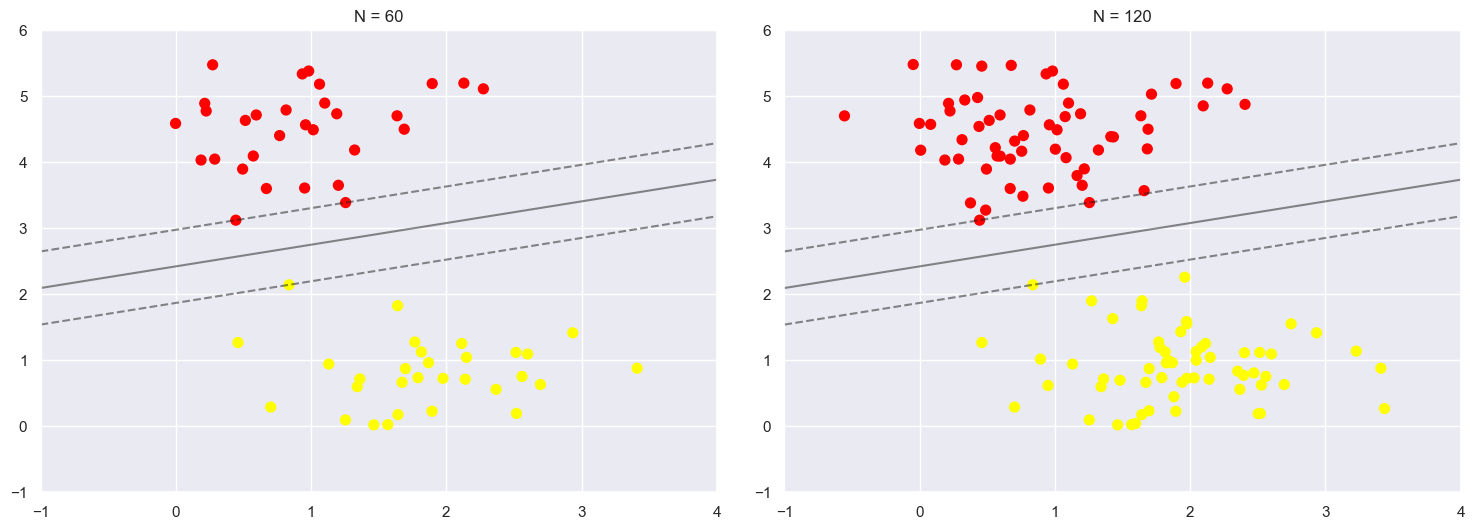

In [8]:
def plot_svm(N=10, ax=None):
    X, y = make_blobs(n_samples=200, centers=2,
                                 random_state=0, cluster_std=0.60)
    X = X[:N]
    y = y[:N]
    model = SVC(kernel='linear', C=1E10)
    model.fit(X, y)
    ax = ax or plt.gca()
    ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn') 
    ax.set_xlim(-1, 4)
    ax.set_ylim(-1, 6)
    plot_svc_decision_function(model, ax)
fig, ax = plt.subplots(1, 2, figsize=(16, 6)) 
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1) 
for axi, N in zip(ax, [60, 120]):
    plot_svm(N, axi)
    axi.set_title('N = {0}'.format(N))

In [9]:
from ipywidgets import interact, fixed 
interact(plot_svm, N=[10, 200], ax=fixed(None));

interactive(children=(Dropdown(description='N', options=(10, 200), value=10), Output()), _dom_classes=('widget…

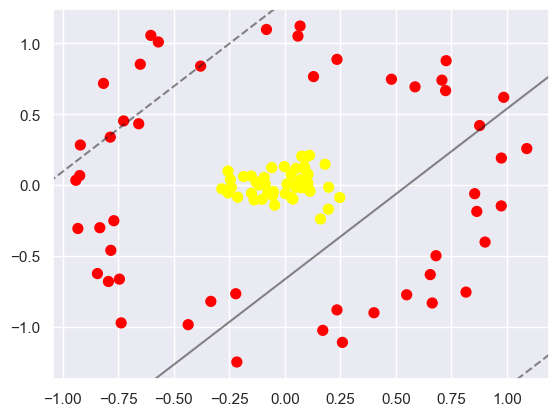

In [10]:
# import numpy as np
# import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.svm import SVC

# Generating circles data
X, y = make_circles(100, factor=.1, noise=.1)

# Fitting a linear kernel SVC
clf = SVC(kernel='linear').fit(X, y)

# Plotting the data and decision function
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf, plot_support=False);


In [11]:
r = np.exp(-(X ** 2).sum(1))
from mpl_toolkits import mplot3d

def plot_3D(elev=30, azim=30, X=X, y=y):
    ax = plt.subplot(projection='3d')
    ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=50, cmap='autumn') 
    ax.view_init(elev=elev, azim=azim)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('r')
interact(plot_3D, elev=[-90, 90], azip=(-180, 180),
         X=fixed(X), y=fixed(y));

interactive(children=(Dropdown(description='elev', options=(-90, 90), value=-90), IntSlider(value=30, descript…

In [12]:
clf = SVC(kernel='rbf', C=1E6)
clf.fit(X, y)


SVC(C=1000000.0)

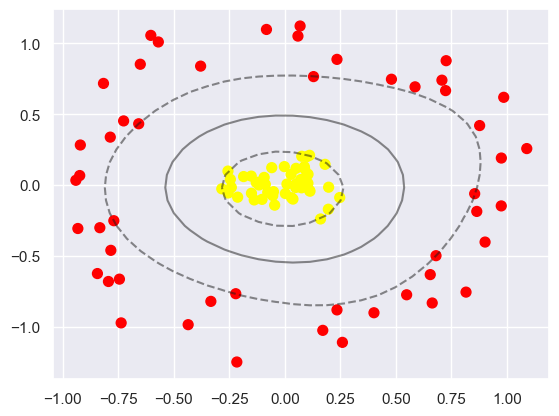

In [13]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=300, lw=1, facecolors='none');

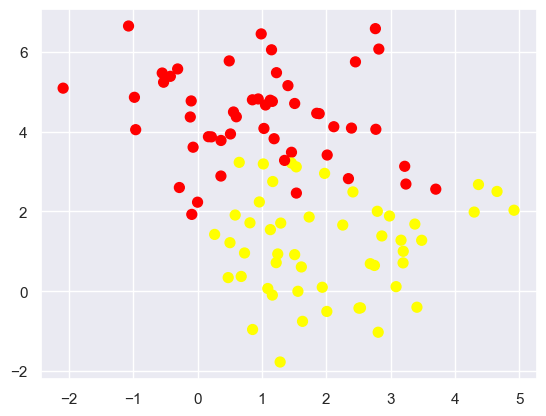

In [14]:
# Tuning the SVM: Softening margins
X, y = make_blobs(n_samples=100, centers=2,
                random_state=0, cluster_std=1.2)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn');

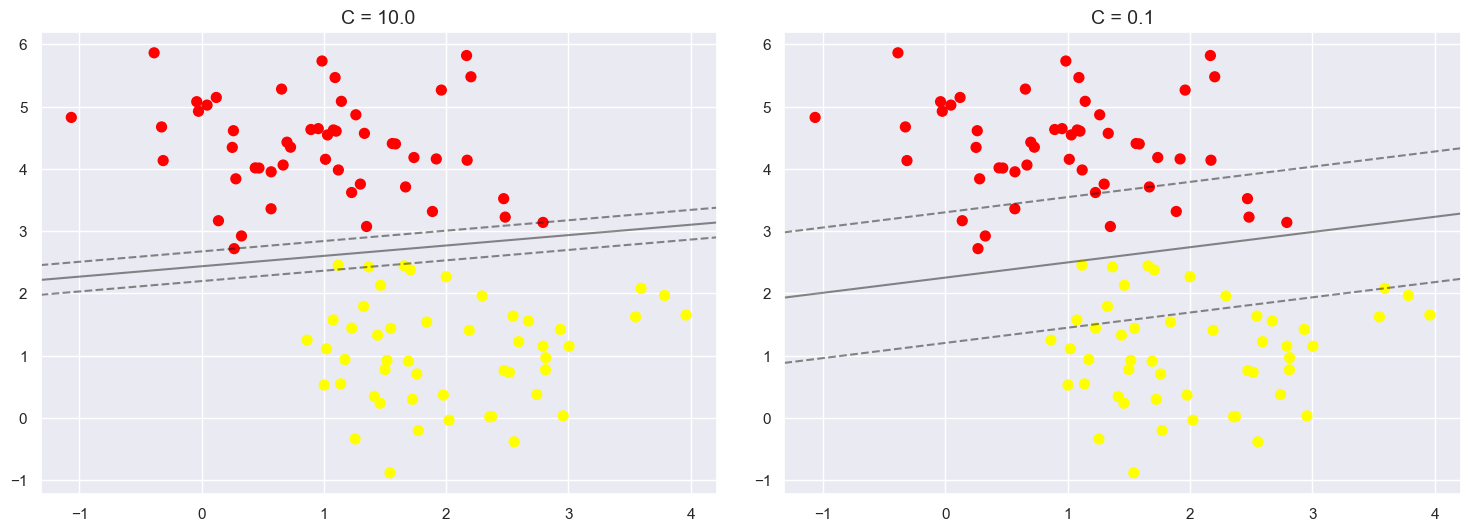

In [15]:
X, y = make_blobs(n_samples=100, centers=2,
                random_state=0, cluster_std=0.8)
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)
for axi, C in zip(ax, [10.0, 0.1]):
    model = SVC(kernel='linear', C=C).fit(X, y) 
    axi.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn') 
    plot_svc_decision_function(model, axi) 
    axi.scatter(model.support_vectors_[:, 0],
                model.support_vectors_[:, 1],
                s=300, lw=1, facecolors='none');
    axi.set_title('C = {0:.1f}'.format(C), size=14)

In [25]:
# Example Face Recognition
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person = 60)
print(faces.target_names)
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348, 62, 47)


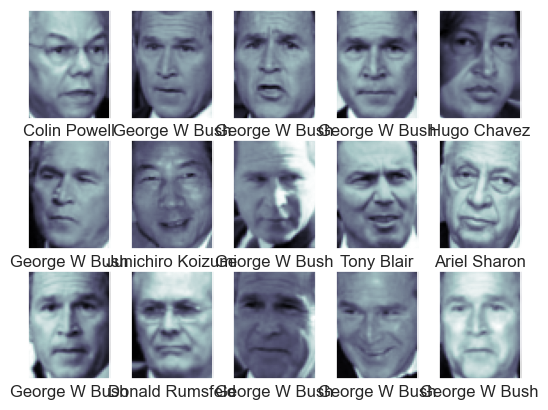

In [26]:
fig, ax = plt.subplots(3, 5)
for i, axi in enumerate(ax.flat):
                axi.imshow(faces.images[i], cmap='bone')
                axi.set(xticks=[], yticks=[],
                        xlabel=faces.target_names[faces.target[i]])

In [27]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline

pca = PCA(n_components = 150, whiten = True, random_state=42, svd_solver = 'randomized')
svc = SVC(kernel = 'rbf',class_weight = 'balanced')
model = make_pipeline(pca,svc)

In [28]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(faces.data, faces.target,random_state = 42)

In [33]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# Initialize the model
model = SVC()

# Define the parameter grid correctly
param_grid = {'svc__C': [1, 5, 10, 50], 'svc__gamma': [0.0001, 0.0005, 0.001, 0.005]}

# Create the GridSearchCV object
grid = GridSearchCV(model, param_grid)

# Fit the grid search to your data
%time grid.fit(Xtrain, ytrain)

# Access the best parameters
print(grid.best_params_)


ValueError: Invalid parameter svc for estimator SVC(). Check the list of available parameters with `estimator.get_params().keys()`.

AttributeError: 'GridSearchCV' object has no attribute 'best_params_'

In [34]:
estimator.get_params().keys()

NameError: name 'estimator' is not defined

In [30]:
model = grid.best_estimator_
yfit = model.predict(Xtest)

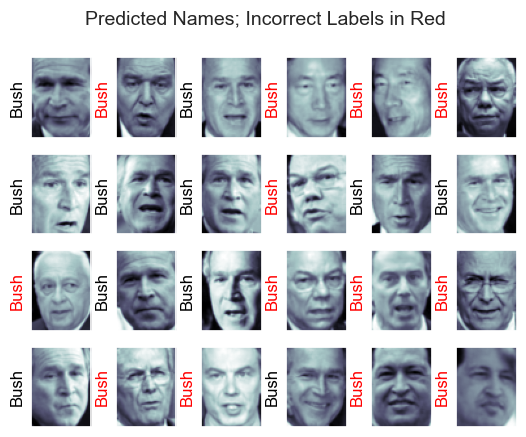

In [31]:
fig, ax = plt.subplots(4, 6)
for i, axi in enumerate(ax.flat):
    axi.imshow(Xtest[i].reshape(62, 47), cmap='bone')
    axi.set(xticks=[], yticks=[])
    axi.set_ylabel(faces.target_names[yfit[i]].split()[-1],color='black' if yfit[i] == ytest[i] else 'red') 
fig.suptitle('Predicted Names; Incorrect Labels in Red', size=14);

In [23]:
from sklearn.metrics import classification_report
print(classification_report(ytest, yfit, target_names = faces.target_names))

                   precision    recall  f1-score   support

     Ariel Sharon       0.00      0.00      0.00        15
     Colin Powell       0.00      0.00      0.00        68
  Donald Rumsfeld       0.00      0.00      0.00        31
    George W Bush       0.37      1.00      0.54       126
Gerhard Schroeder       0.00      0.00      0.00        23
      Hugo Chavez       0.00      0.00      0.00        20
Junichiro Koizumi       0.00      0.00      0.00        12
       Tony Blair       0.00      0.00      0.00        42

         accuracy                           0.37       337
        macro avg       0.05      0.12      0.07       337
     weighted avg       0.14      0.37      0.20       337



/Users/pritish/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/pritish/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/pritish/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


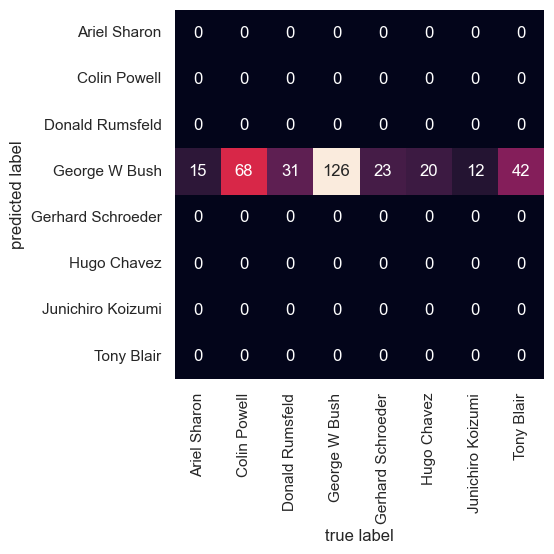

In [24]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(ytest, yfit)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=faces.target_names,
            yticklabels=faces.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');